# Spatial visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
% matplotlib inline

import shapely
from shapely.geometry import Point
import shapely.wkt
import geopandas as gpd

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
display(HTML("<style>.output_result { max-width:90% !important; }</style>"))
display(HTML("<style>.prompt { display:none !important; }</style>"))

C:\Users\Michal_schudnij\AppData\Roaming\Python\Python36\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [191]:
df_warszawa =pd.read_csv("../datasets/preprocessed_data/df_warszawa.csv")
df_krakow = pd.read_csv("../datasets/preprocessed_data/df_krakow.csv")
df_poznan = pd.read_csv("../datasets/preprocessed_data/df_poznan.csv")

In [192]:
df_all = pd.concat([df_warszawa, df_krakow, df_poznan])

In [193]:
# df_warszawa['geometry'] = df_warszawa.apply(lambda x: shapely.wkt.loads(x['geometry']), axis=1)
# df_warszawa = gpd.GeoDataFrame(df_warszawa, geometry = 'geometry', crs = "epsg:4258")

# df_krakow['geometry'] = df_krakow.apply(lambda x: shapely.wkt.loads(x['geometry']), axis=1)
# df_krakow = gpd.GeoDataFrame(df_krakow, geometry = 'geometry', crs = "epsg:4258")

# df_poznan['geometry'] = df_poznan.apply(lambda x: shapely.wkt.loads(x['geometry']), axis=1)
# df_poznan = gpd.GeoDataFrame(df_poznan, geometry = 'geometry', crs = "epsg:4258")

In [194]:
def transform_df(df):
    
    df['geometry'] = df.apply(lambda x: shapely.wkt.loads(x['geometry']), axis=1)
    df = gpd.GeoDataFrame(df, geometry = 'geometry', crs = "epsg:4258")
    
    df['are_buildings'] = (df['buildings'] > 0)

    df['operators'] = df.apply(lambda x: [x['inpost'], x['poczta'], x['dhl'], x['dpd'], x['ruch'], x['ups'], x['fedex']], axis = 1)
    df['leader'] = df.apply(lambda x: np.max(x['operators']) != 0, axis = 1)
    df['pos'] = df.apply(lambda x: np.where((x['leader'] == 1), np.argmax(x['operators']), 100), axis = 1)

    dict_pos = {0: 'inpost', 1: 'poczta', 2: 'dhl', 3: 'other', 4: 'other', 5: 'other', 6: 'other', 100: 'no_leader'}
    dict_pos2 = {0: 'inpost', 1: 'poczta', 2: 'dhl', 3: 'dpd', 4: 'ruch', 5: 'ups', 6: 'fedex', 100: 'no_leader'}

    df['leader'] = df['pos'].replace(dict_pos)
    df['no_leader'] = 0
    df['leader_number'] = df.apply(lambda x: x[dict_pos2[float(x['pos'])]], axis = 1)

    df['other'] = df['dhl'] + df['dpd'] + df['fedex'] + df['poczta'] + df['ruch'] + df['ups']
    df['przewaga_inpost'] = df['inpost'] > df['other']
    df['przewaga_inpost2'] = df['inpost'] > 1/2*df['other']
    
    return df

In [195]:
df_warszawa = transform_df(df_warszawa)
df_poznan = transform_df(df_poznan)
df_krakow = transform_df(df_krakow)
df_all = transform_df(df_all)

In [262]:
def visualisation(df):
    print('\nBasic plot of city')
    df.plot(figsize=(20,10))
    plt.show()
    
    print('\nLeader of operators')
    df.plot(column="leader", categorical = True, legend=True, figsize=(20,10), cmap='Set1', edgecolor='white', label = 'pyk')
    plt.show()
    
    print('\nLeader of operators with number of instances')
    operators = {'inpost' : 'Reds', 'poczta': 'Blues', 'dhl': 'Greens', 'other': 'Oranges', 'no_leader': 'flare'}
    fig, ax = plt.subplots(figsize=(20, 10))
    divider = make_axes_locatable(ax)
    for operator, color in operators.items():
        cax = divider.append_axes('right', size='2%', pad=0.8)
        cax.set_xlabel(operator)
        df[df.leader == operator].plot(column='leader_number', cmap=color,legend=True, ax=ax, cax=cax, edgecolor = 'black')
    plt.show()
    
    print('\nDominance of inpost points over all others')
    df.plot(column="przewaga_inpost", categorical = True, legend=True, figsize=(20,10), cmap='Set1', edgecolor='white', label = 'pyk')
    plt.show()
    
    print('\nFemale ratio')
    df.plot(column="fem_ratio", legend=True, figsize=(20,10), cmap='Reds', edgecolor='white', label = 'pyk')
    plt.show()
    
    print('\nForests')
    df.plot(column="fem_ratio", legend=True, figsize=(20,10), cmap='Greens', edgecolor='white', label = 'pyk')
    plt.show()
    


Basic plot of city


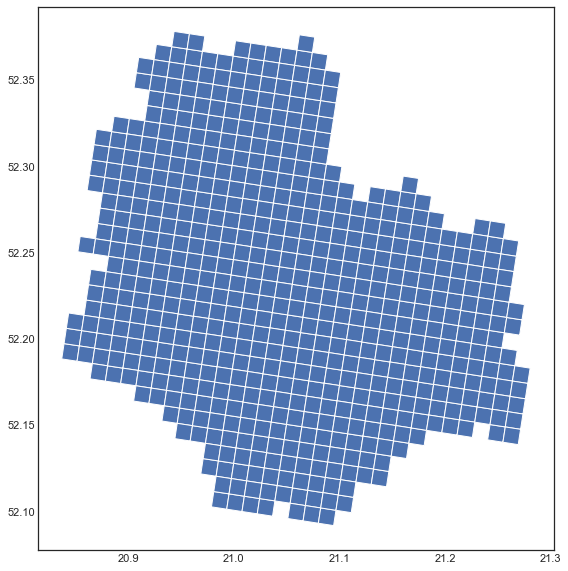


Leader of operators


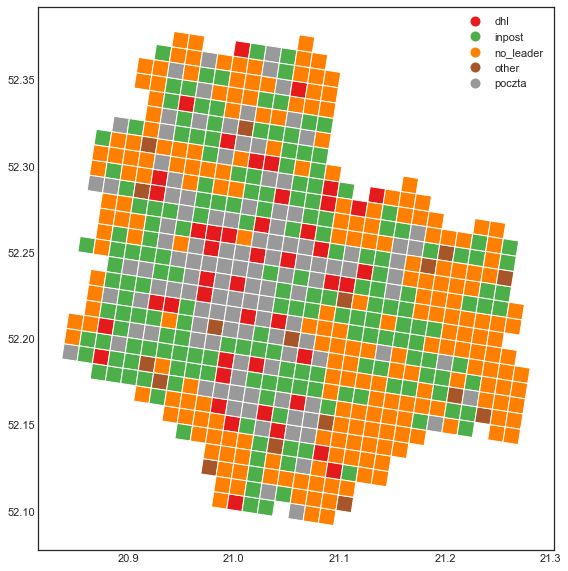


Leader of operators with number of instances


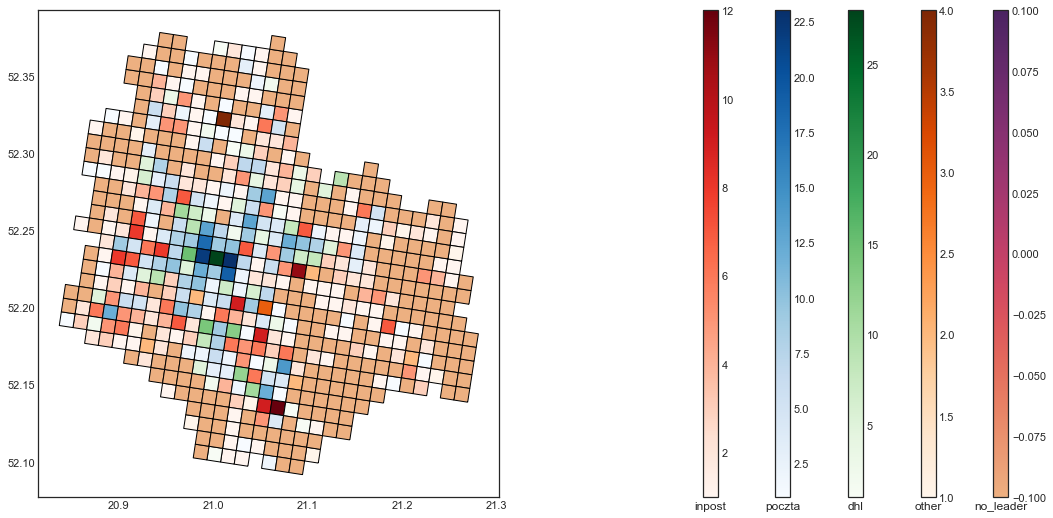


Dominance of inpost points over all others


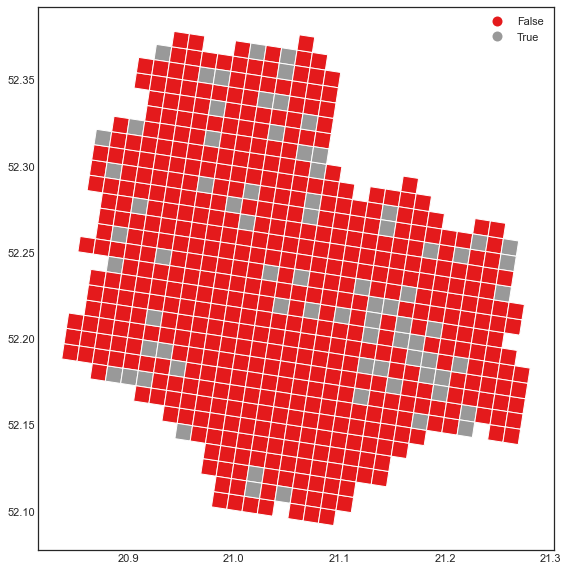


Female ratio


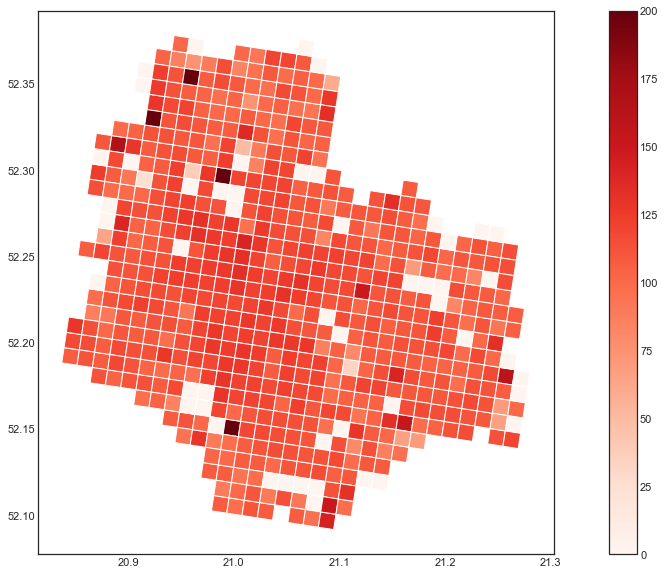


Forests


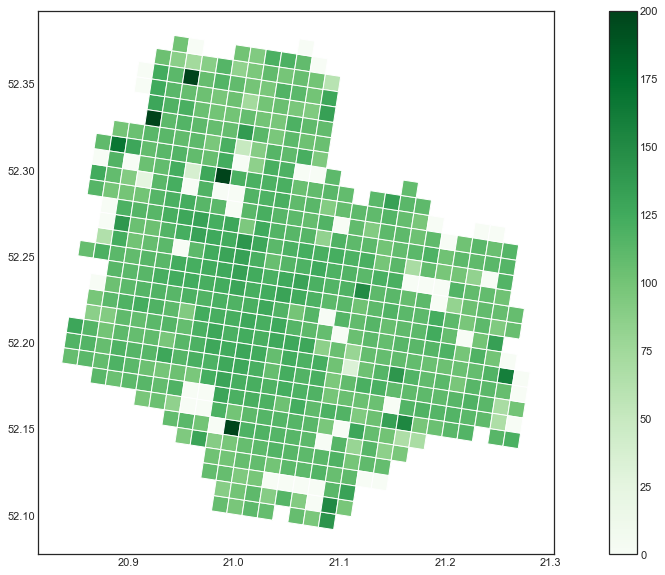

In [263]:
visualisation(df_warszawa)


Basic plot of city


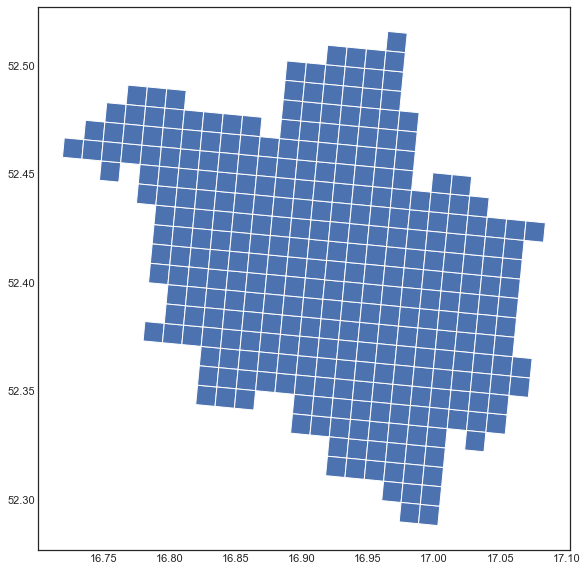


Leader of operators


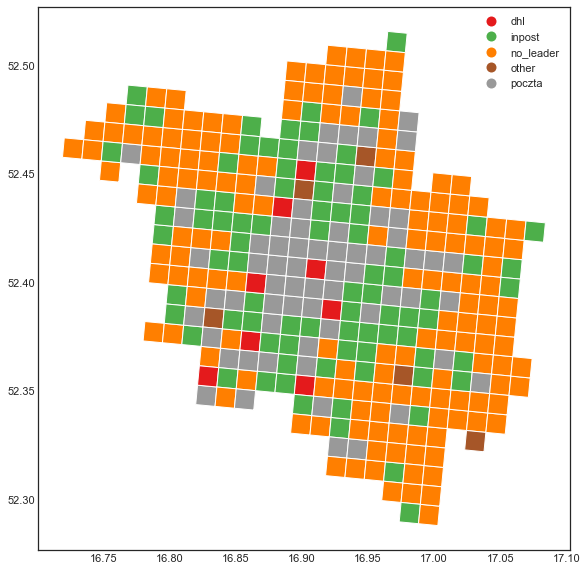


Leader of operators with number of instances


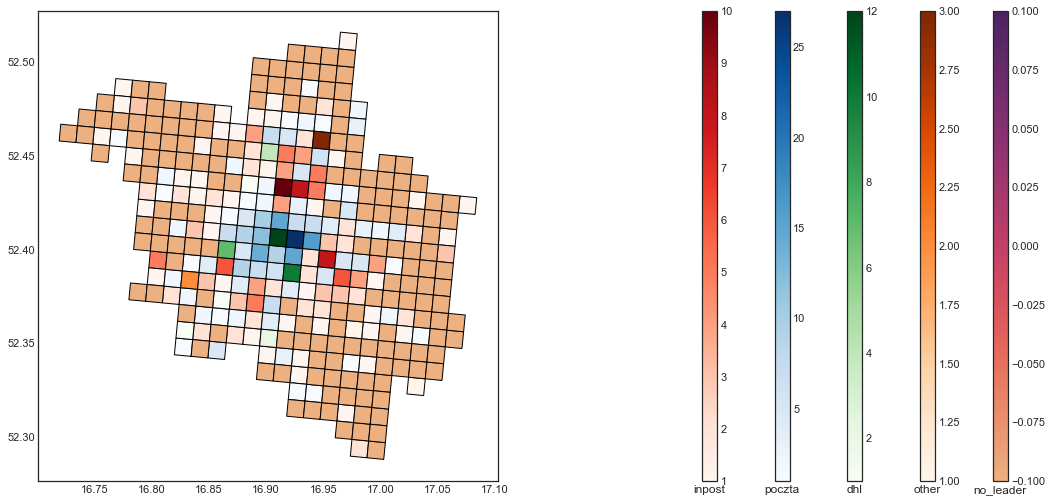


Dominance of inpost points over all others


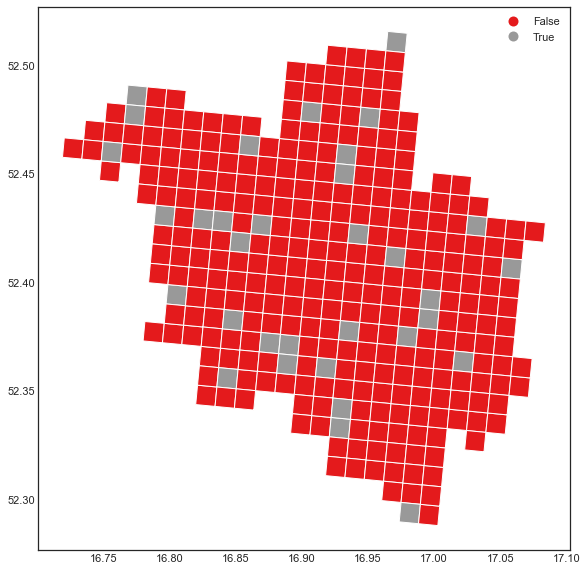


Female ratio


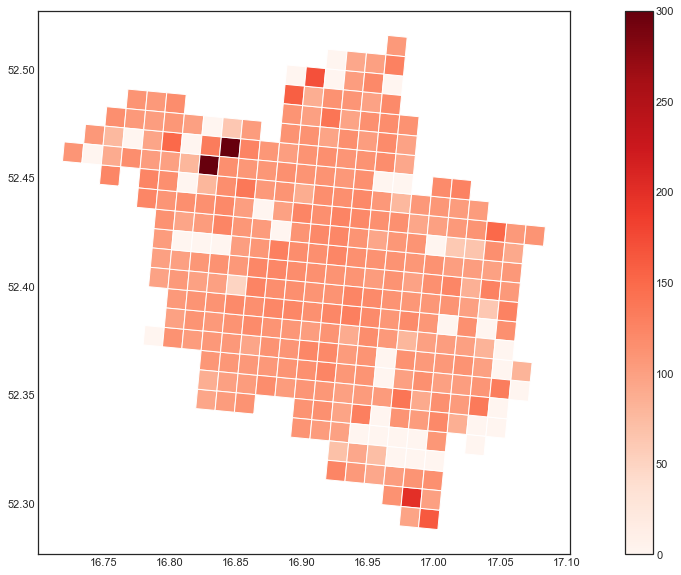


Forests


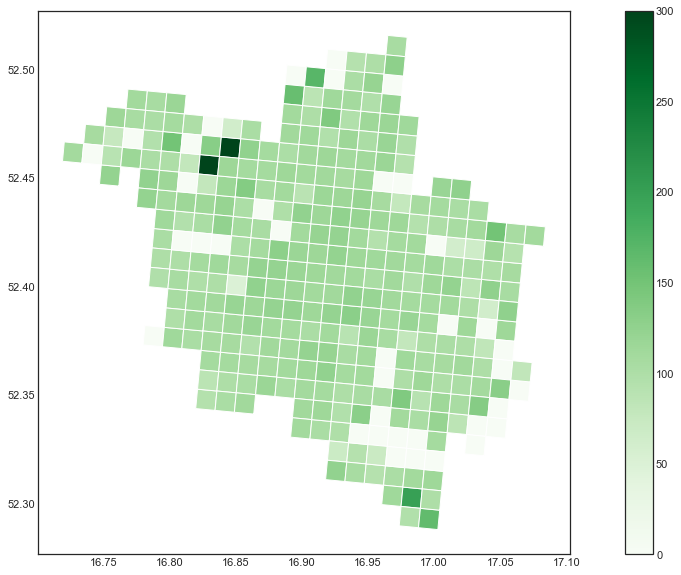

In [264]:
visualisation(df_poznan)


Basic plot of city


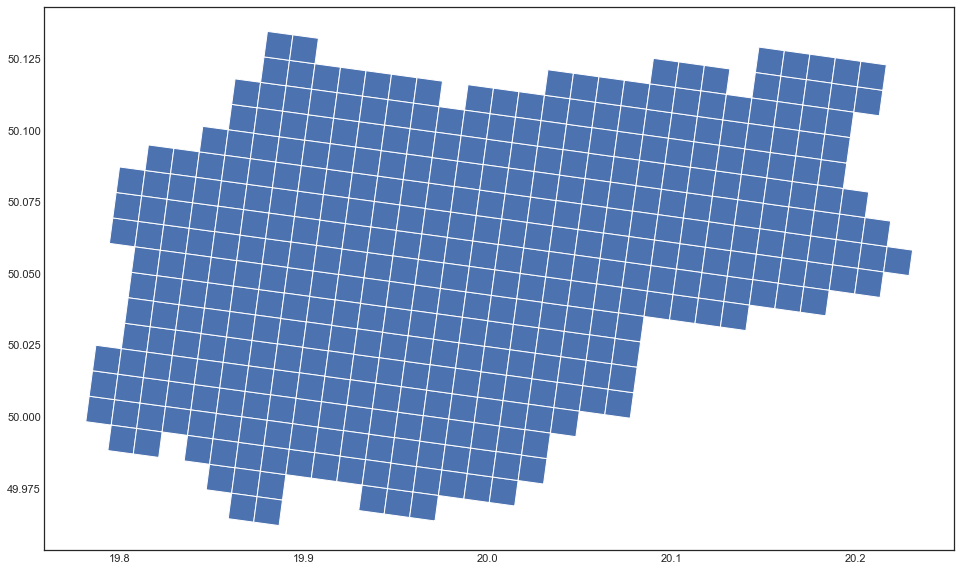


Leader of operators


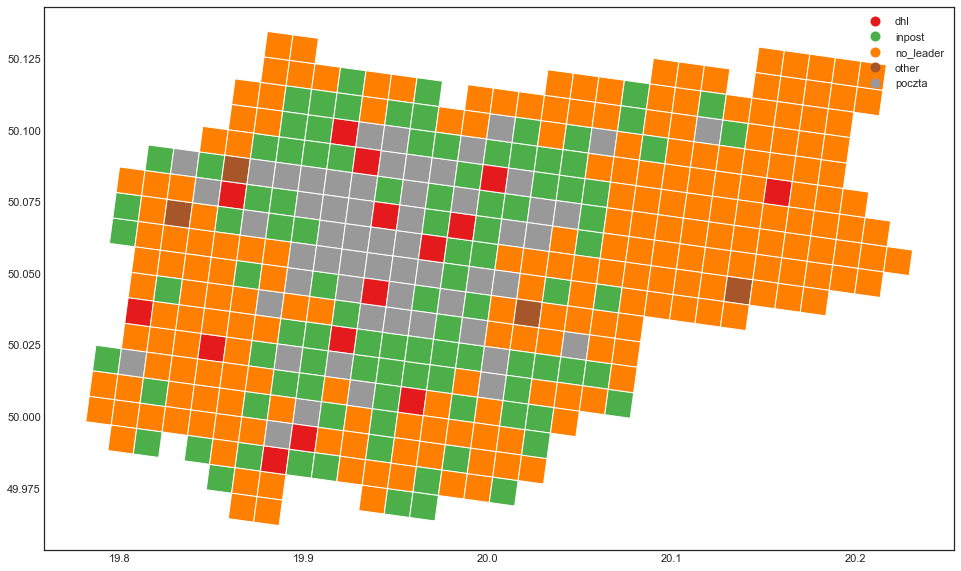


Leader of operators with number of instances


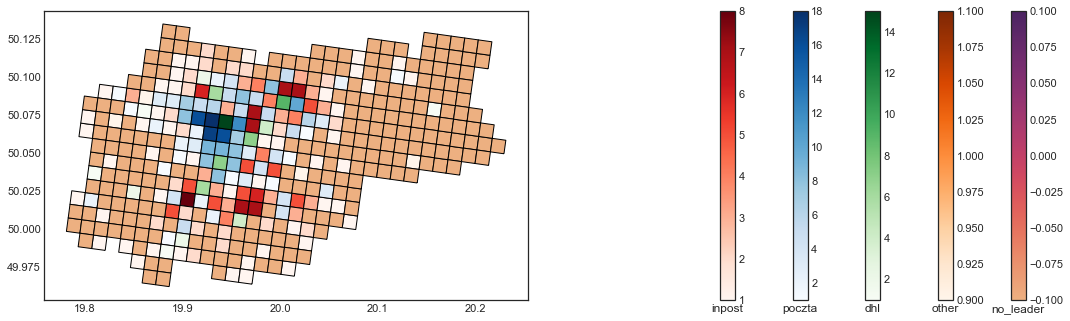


Dominance of inpost points over all others


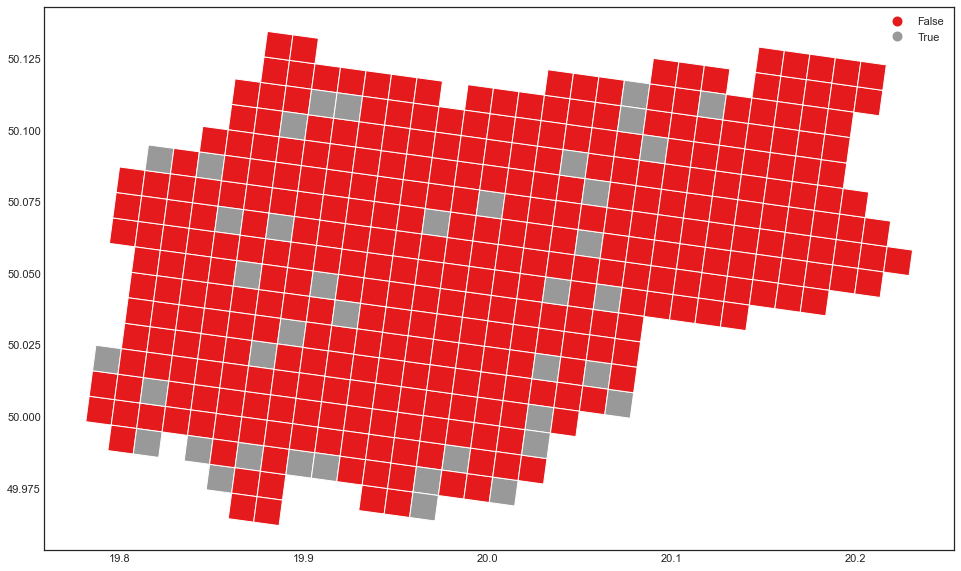


Female ratio


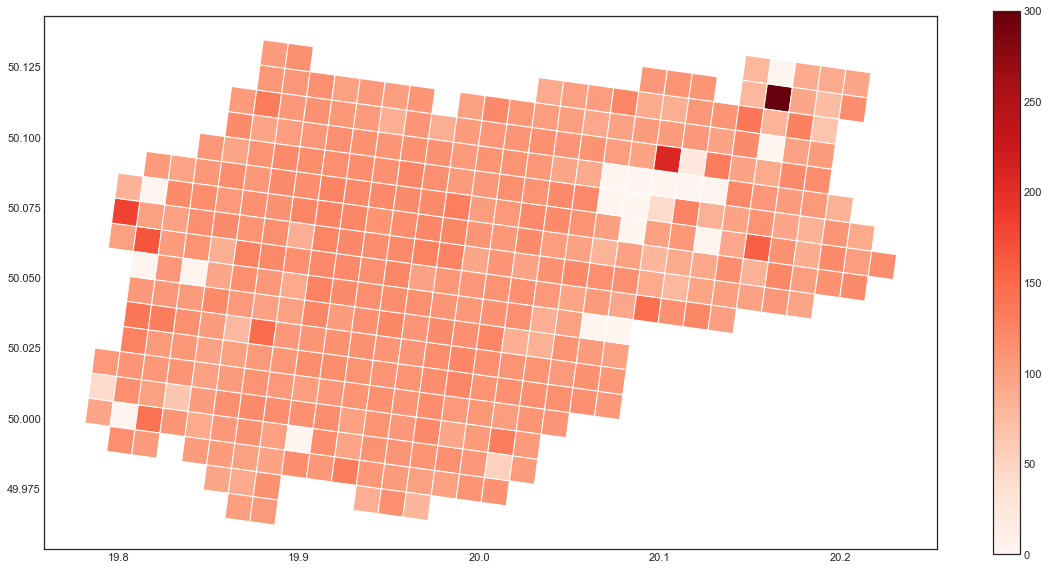


Forests


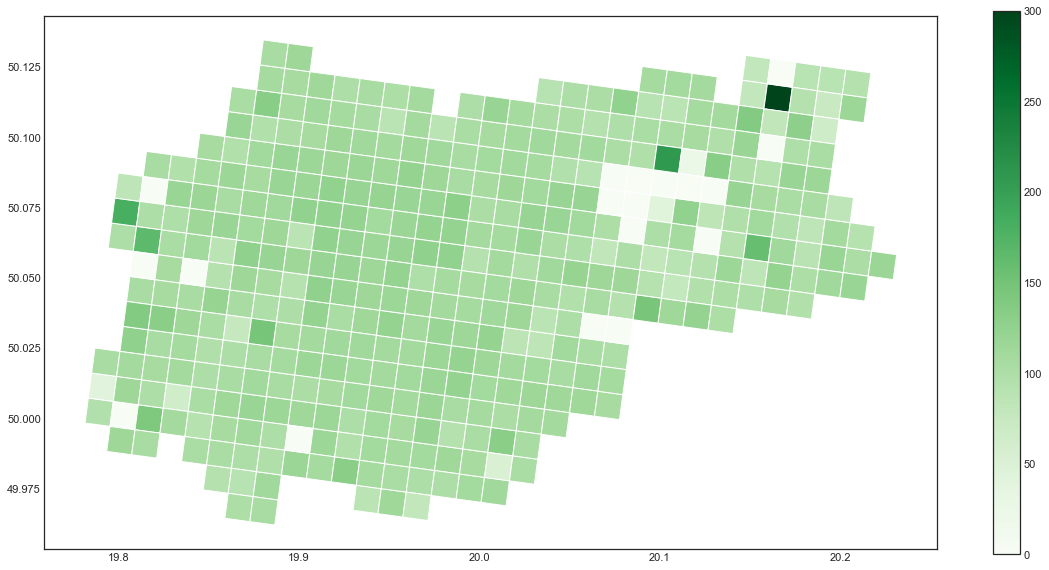

In [265]:
visualisation(df_krakow)

In [242]:
display(df_warszawa[['dhl', 'dpd', 'fedex', 'inpost', 'poczta', 'ruch', 'ups']].agg(['sum', 'mean', 'max']))

dhl         dpd     fedex      inpost       poczta        ruch  \
sum   1006.000000  292.000000  18.00000  973.000000  1128.000000  278.000000   
mean     1.673877    0.485857   0.02995    1.618968     1.876872    0.462562   
max     28.000000    9.000000   2.00000   13.000000    23.000000    7.000000   

             ups  
sum   153.000000  
mean    0.254576  
max     5.000000

# Warszawa

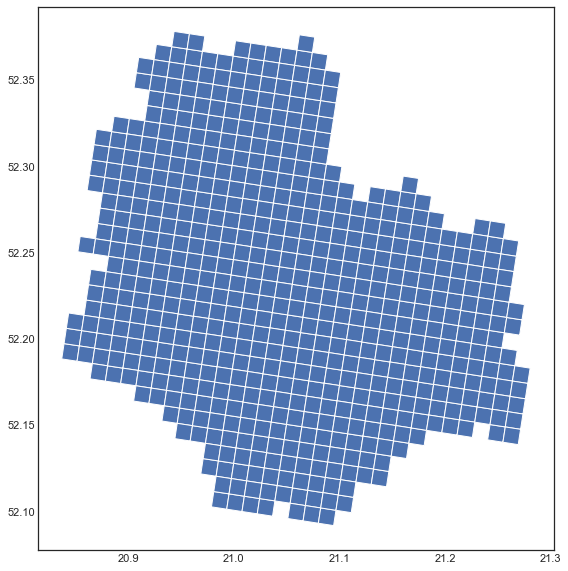

In [208]:
df_warszawa.plot(figsize=(20,10))
plt.show()

## Inpost vs Other

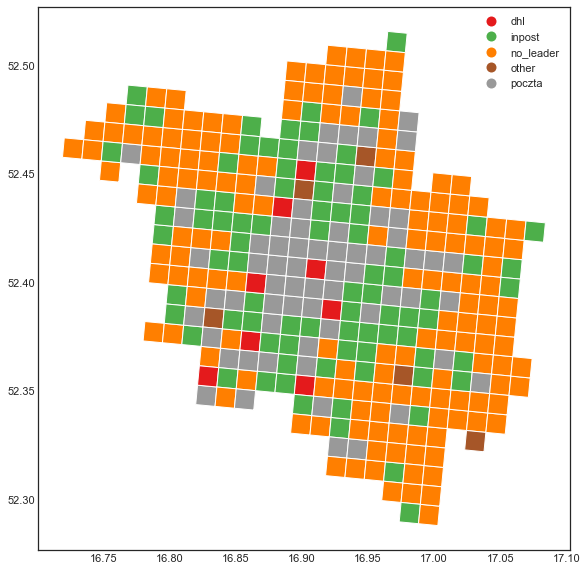

In [198]:
df_poznan.plot(column="leader", categorical = True, legend=True, figsize=(20,10), cmap='Set1', edgecolor='white', label = 'pyk') #cmap='OrRd',
plt.show()

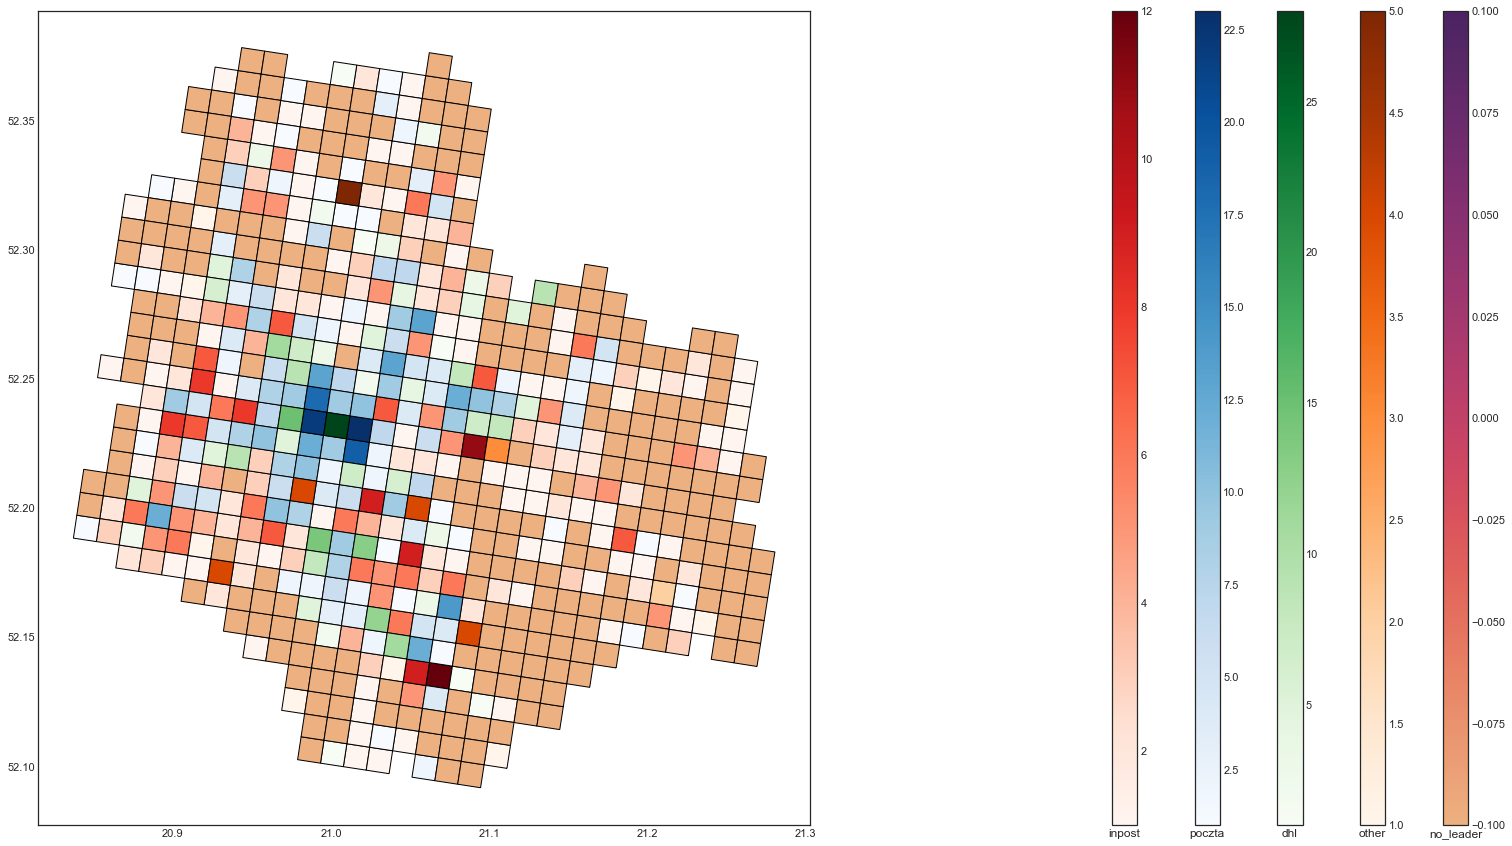

In [168]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.style.use('seaborn-white')

# map operators with colors
operators = {'inpost' : 'Reds', 
           'poczta': 'Blues', 
           'dhl': 'Greens', 
           'other': 'Oranges',
           'no_leader': 'flare'}



fig, ax = plt.subplots(figsize=(30, 15))
divider = make_axes_locatable(ax)

for operator, color in operators.items():

    cax = divider.append_axes('right', size='2%', pad=0.8)
    cax.set_xlabel(operator)

    df_warszawa[df_warszawa.leader == operator].plot(column='leader_number', cmap=color,legend=True, ax=ax, cax=cax, edgecolor = 'black')

In [ ]:
df_warszawa.plot(column="inpost", legend=True, figsize=(20,10))
plt.show()

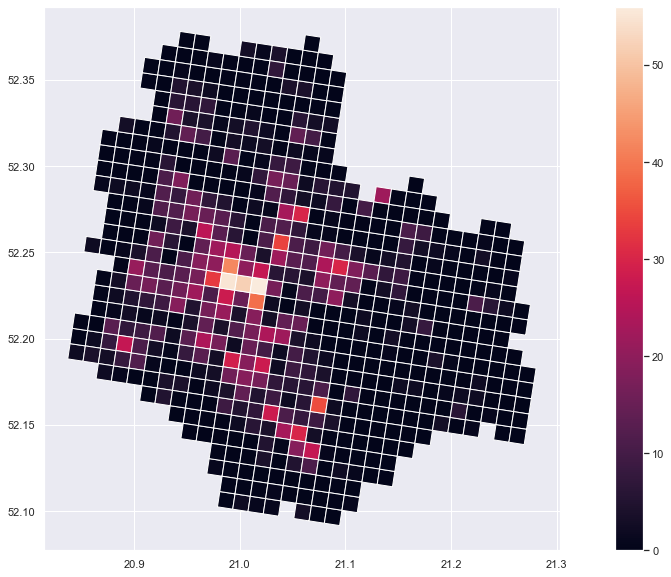

In [10]:
df_warszawa.plot(column="other", legend=True, figsize=(20,10))
plt.show()

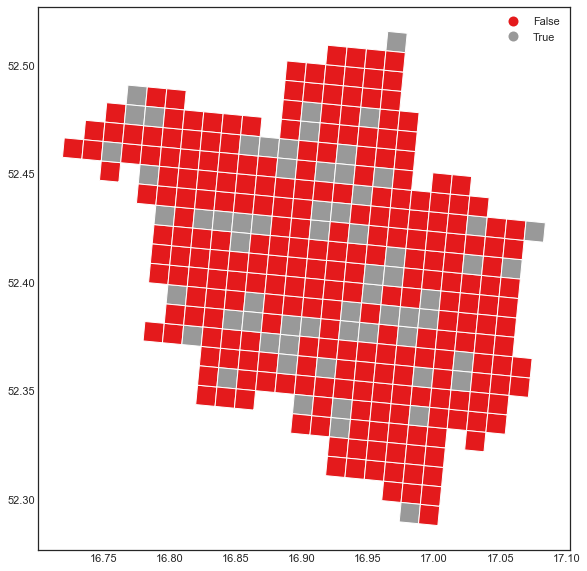

In [206]:
df_poznan.plot(column="przewaga_inpost2", categorical = True, legend=True, cmap= 'Set1', figsize=(20,10))
plt.show()

In [220]:
# # uproszczenie geometrii
# mapa_gmn.geometry = mapa_gmn.geometry.simplify(0.005) # mniejsza wartosc = bardziej dokładnie
 
# # dane do GeOJSON na potrzeby Folium
# gmn_geoPath = mapa_gmn.to_json()

In [221]:
import folium

In [234]:
gmn_geoPath = df_warszawa[['grid_index','geometry']].to_json()

In [235]:
df_warszawa.head()

grid_index                                           geometry  dhl  dpd  \
0      206436  POLYGON ((20.85177 52.18687, 20.83728 52.18820...  0.0  0.0   
1      206464  POLYGON ((20.87799 52.29333, 20.86347 52.29467...  0.0  0.0   
2      206476  POLYGON ((20.85395 52.19574, 20.83946 52.19708...  0.0  0.0   
3      206492  POLYGON ((20.88018 52.30220, 20.86566 52.30354...  0.0  0.0   
4      206505  POLYGON ((20.87580 52.28446, 20.86129 52.28579...  0.0  0.0   

   fedex  inpost  poczta  ruch  ups   tot  ...  bus_stops  are_buildings  \
0    0.0     0.0     1.0   0.0  1.0  4841  ...        0.0           True   
1    0.0     0.0     0.0   0.0  0.0   137  ...        0.0           True   
2    0.0     0.0     0.0   0.0  0.0   269  ...        0.0           True   
3    0.0     0.0     0.0   0.0  0.0     0  ...        0.0          False   
4    0.0     0.0     1.0   0.0  0.0   386  ...        0.0          False   

                             operators     leader  pos  no_leader  \
0  [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0]     poczta    1          0   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  no_leader  100          0   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  no_leader  100          0   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  no_leader  100          0   
4  [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]     poczta    1          0   

   leader_number  other  przewaga_inpost  przewaga_inpost2  
0            1.0    2.0            False             False  
1            0.0    0.0            False             False  
2            0.0    0.0            False             False  
3            0.0    0.0            False             False  
4            1.0    1.0            False             False  

[5 rows x 41 columns]

In [239]:
# 52,19 to w przybliżeniu środek mapy w postaci lat,long
mapa = folium.Map([52.2, 21], zoom_start=11)
 
folium.Choropleth(geo_data=gmn_geoPath,
                  data=df_warszawa,
                  columns=['grid_index', 'forests'],
                  key_on='feature.properties.grid_index',
                  fill_color='YlOrRd', 
                  fill_opacity=0.7,
                  line_opacity=0.2,
                  legend_name="Liczba paczkomatów").add_to(mapa)
 
# zapisanie utworzonej mapy do pliku HTML
# mapa.save(outfile = 'bezrobocie_gminy.html')
 
# pokazujemy mapę
mapa